# Exercise 1: Data Preparation

In this exercise, we will perform data preparation tasks on the Breast Cancer Wisconsin (Diagnostic) dataset. The tasks include loading the dataset, handling missing values, exploring feature distributions, and examining correlations with the target variable.

## 1. Import Required Libraries

Import the necessary Python libraries for data manipulation and analysis.

In [311]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use("default")             # keep things clean
sns.set_theme(style="whitegrid")     # Seaborn theme
sns.set_palette("Set2")              # Seaborn palette

In [312]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Data Loading

Load your dataset and perform initial exploration.

In [313]:
import sklearn.datasets

data = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

df = pd.concat(data, axis=1)
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Save the DataFrame to a pickle file under ../data directory
df.to_pickle('../data/breast_cancer_data.pkl')

## 3. Exploratory Data Analysis (EDA)

Perform exploratory data analysis to understand the dataset structure and characteristics.

In [314]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [315]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


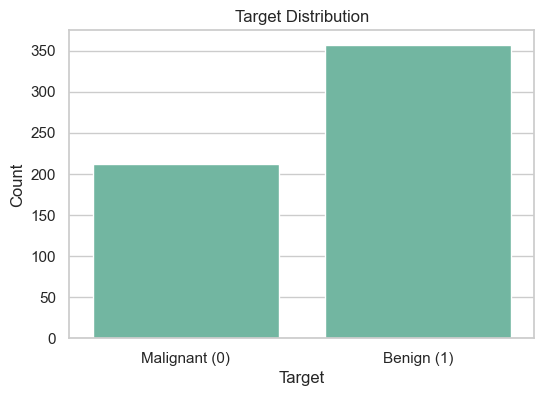

In [316]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks([0, 1], ["Malignant (0)", "Benign (1)"])
plt.show()

### Correlation with Target Variable

Now, we will display the correlation of each feature with the target variable.

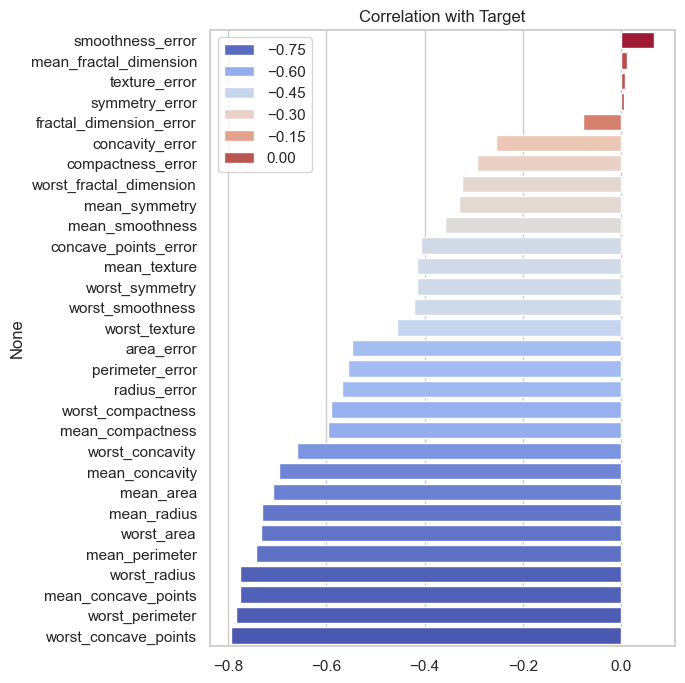

In [317]:
target_corr = df.corr()["target"].drop("target").sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm", hue=target_corr.values)
plt.title("Correlation with Target")
plt.show()

- A negative correlation indicates that as the feature value increases, the tumor is more likely to be malignant.
- A positive correlation indicates that as the feature value increases, the tumor is more likely to be benign.
- A correlation close to 0 suggests there is little to no linear relationship between the feature and the target.

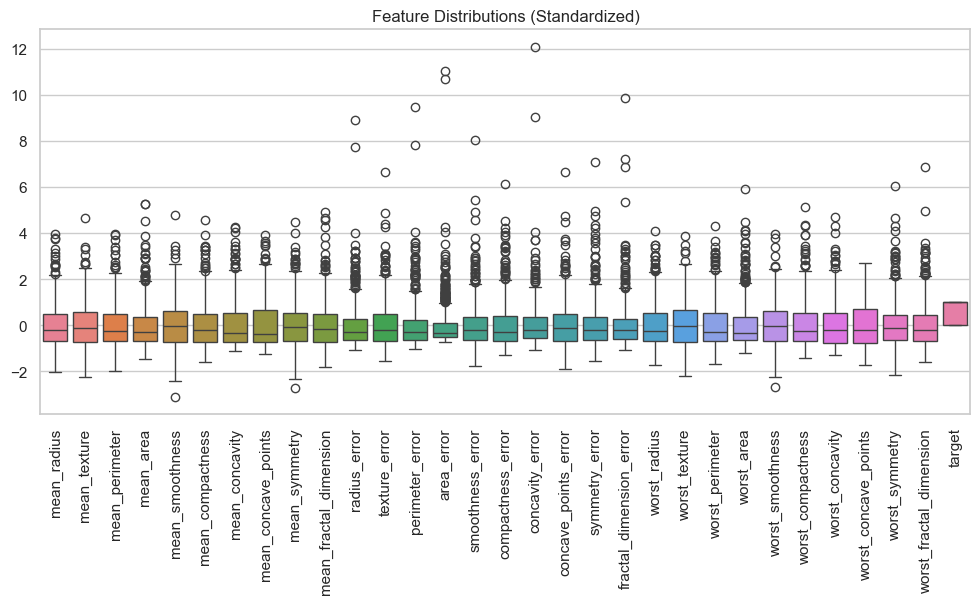

In [318]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns="target")), columns=df.columns[:-1])
df_scaled["target"] = df["target"].values

plt.figure(figsize=(12,5))
sns.boxplot(data=df_scaled)
plt.title("Feature Distributions (Standardized)")
plt.xticks(rotation=90)
plt.show()

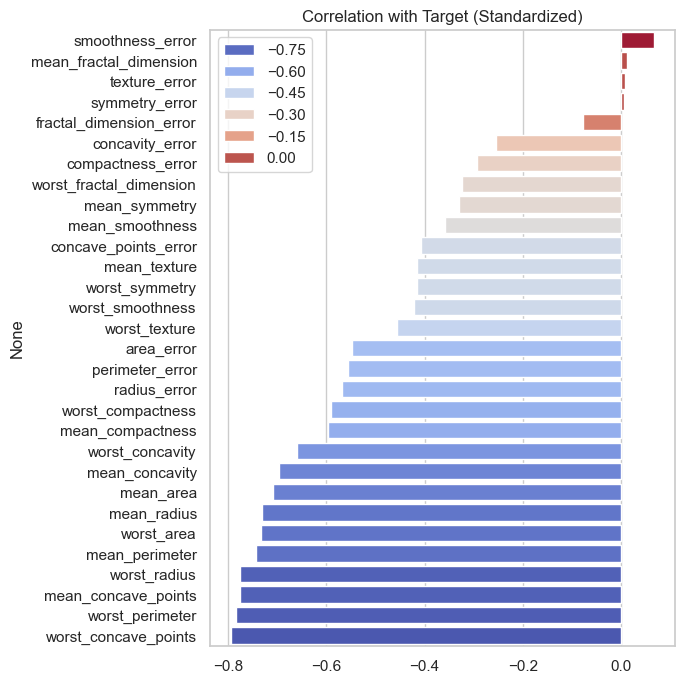

In [319]:
target_corr = df_scaled.corr()["target"].drop("target").sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm", hue=target_corr.values)
plt.title("Correlation with Target (Standardized)")
plt.show()

## 4. Data Cleaning

Handle missing values, outliers, and inconsistencies in the data.

In [320]:
# TODO: Detect and handle outliers
# - Use statistical methods (IQR, Z-score) or visualization
# - Decide whether to remove, cap, or transform outliers

## 5. Feature Engineering

Create new features or transform existing ones to improve model performance.

In [321]:
# TODO: Feature engineering tasks
# - Create new features from existing ones
# - Encode categorical variables
# - Scale numerical features if necessary

## 6. Data Splitting

Split the data into training and testing sets.

In [322]:
# TODO: Separate features and target variable
# X = ...
# y = ...

# TODO: Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(...)

# TODO: Display the shapes of the resulting datasets

## 7. Data Preprocessing Pipeline

Create a preprocessing pipeline for consistent data transformation.

In [323]:
# TODO: Create preprocessing pipeline
# - Include scaling, encoding, and any other necessary transformations
# - Fit the pipeline on training data
# - Transform both training and testing data

## 8. Summary and Next Steps

Summarize the data preparation process and prepare for model training.

In [324]:
# TODO: Save the preprocessed data for use in subsequent exercises
# Example: 
# pd.DataFrame(X_train_processed).to_csv('../data/X_train_processed.csv', index=False)
# pd.DataFrame(X_test_processed).to_csv('../data/X_test_processed.csv', index=False)
# pd.Series(y_train).to_csv('../data/y_train.csv', index=False)
# pd.Series(y_test).to_csv('../data/y_test.csv', index=False)

## Reflection Questions

1. What challenges did you encounter during data preparation?
2. How did you decide on the strategy for handling missing values?
3. What feature engineering techniques did you apply and why?
4. How might different preprocessing choices affect model performance?

**TODO: Answer the reflection questions above in markdown cells below.**